In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [5]:
usage = spark.read.csv("Documents/powerconsumption.csv", header=True, inferSchema=True)
usage.show()

+-------------+-----------+--------+---------+-------------------+------------+----------------------+----------------------+----------------------+
|     Datetime|Temperature|Humidity|WindSpeed|GeneralDiffuseFlows|DiffuseFlows|PowerConsumption_Zone1|PowerConsumption_Zone2|PowerConsumption_Zone3|
+-------------+-----------+--------+---------+-------------------+------------+----------------------+----------------------+----------------------+
|1/1/2017 0:00|      6.559|    73.8|    0.083|              0.051|       0.119|            34055.6962|           16128.87538|           20240.96386|
|1/1/2017 0:10|      6.414|    74.5|    0.083|               0.07|       0.085|           29814.68354|           19375.07599|           20131.08434|
|1/1/2017 0:20|      6.313|    74.5|     0.08|              0.062|         0.1|           29128.10127|           19006.68693|           19668.43373|
|1/1/2017 0:30|      6.121|    75.0|    0.083|              0.091|       0.096|           28228.86076|    

In [12]:
temperature_data = usage.select("Temperature").toPandas()


In [16]:

!pip install matplotlib
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/46/37/b5e27ab30ecc0a3694c8a78287b5ef35dad0c3095c144fcc43081170bfd6/matplotlib-3.8.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ce/e9/99bf2f9dcab9bf81ae0a4918640c4296049aa3e31bad0cb15e9a09268518/fonttools-4.44.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/157.7 kB ? eta -:--:--
     ----------------- --------------------- 71.7/157.7 kB 2.0 MB/s e

In [20]:
!pip install seaborn 
import seaborn as sns

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.6 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


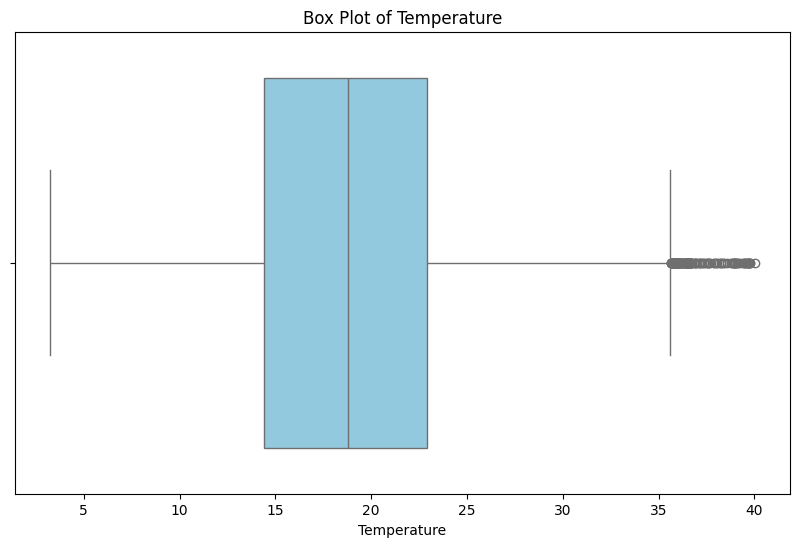

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=temperature_data["Temperature"], color='skyblue')
plt.xlabel('Temperature')
plt.title('Box Plot of Temperature')
plt.show()

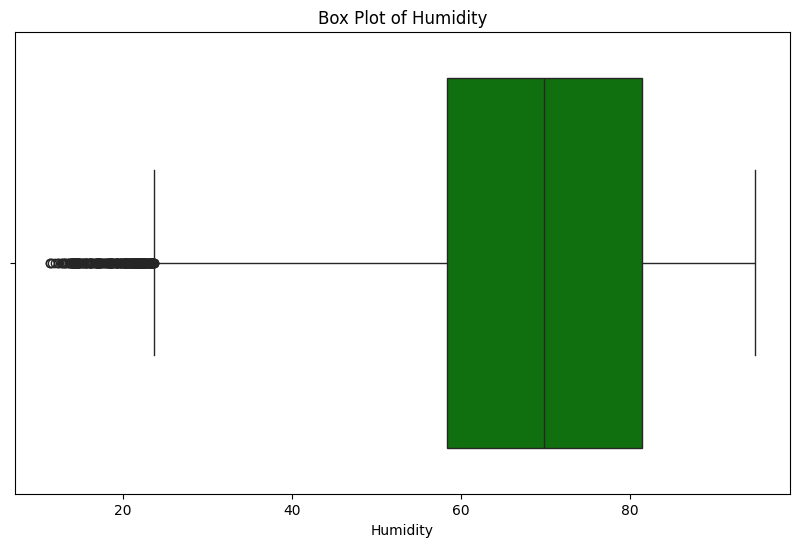

In [25]:
humidity_data = usage.select("Humidity").toPandas()
plt.figure(figsize=(10, 6))
sns.boxplot(x=humidity_data["Humidity"], color='green')
plt.xlabel('Humidity')
plt.title('Box Plot of Humidity')
plt.show()

In [33]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.2/9.2 MB 5.9 MB/s eta 0:00:02
     - -------------------------------------- 0.3/9.2 MB 3.9 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 4.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.2 MB 8.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.7/9.2 MB 11.6 MB/s eta 0:00:01
     ---------------- ----------------------- 3.7/9.2 MB 13.2 MB/s eta 0:00:01
     --------------------- ------------------ 4.9/9.2 MB 15.0 MB/s eta 0:00:01
     --------------------------- ------------ 6.3/9.2 MB 16.9 MB/s eta 0:00:01
     -------------------------------- ------- 7.5/9.2 MB 17.7 MB/s eta 0:00:01
     -------------------------------------- - 8.9/9.2 MB 18.9 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 19.0 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 19.0 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'sklearn'

In [34]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/69/8a/cf17d6443f5f537e099be81535a56ab68a473f9393fbffda38cd19899fc8/scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.2/9.3 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.3 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.3 MB 3.3 MB/s


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.ensemble import IsolationForest

TypeError: 'Column' object is not callable

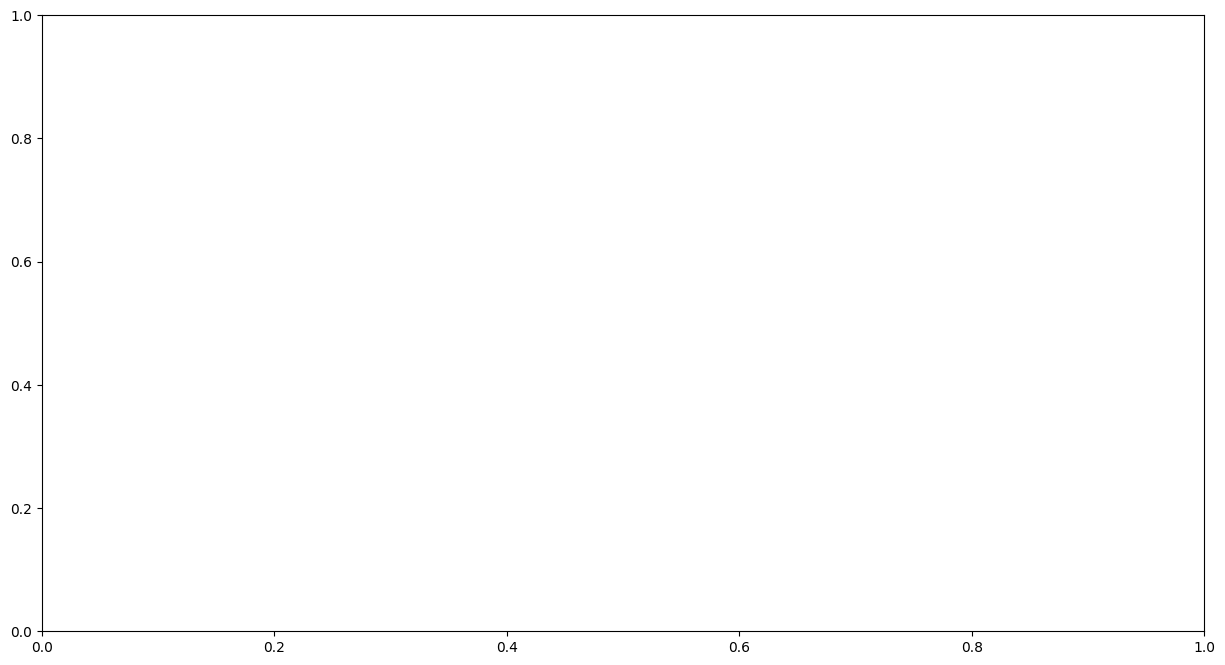

In [37]:
plt.figure(figsize=(15, 8))
plt.plot(usage['Temperature'], label='Temperature', color='blue')



In [39]:
result_temperature = seasonal_decompose(usage['Temperature'], period=seasonal_period)
result_humidity = seasonal_decompose(usage['Humidity'], period=seasonal_period)


NameError: name 'seasonal_period' is not defined

In [41]:
usqage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))
usage_pandas = usage.toPandas()


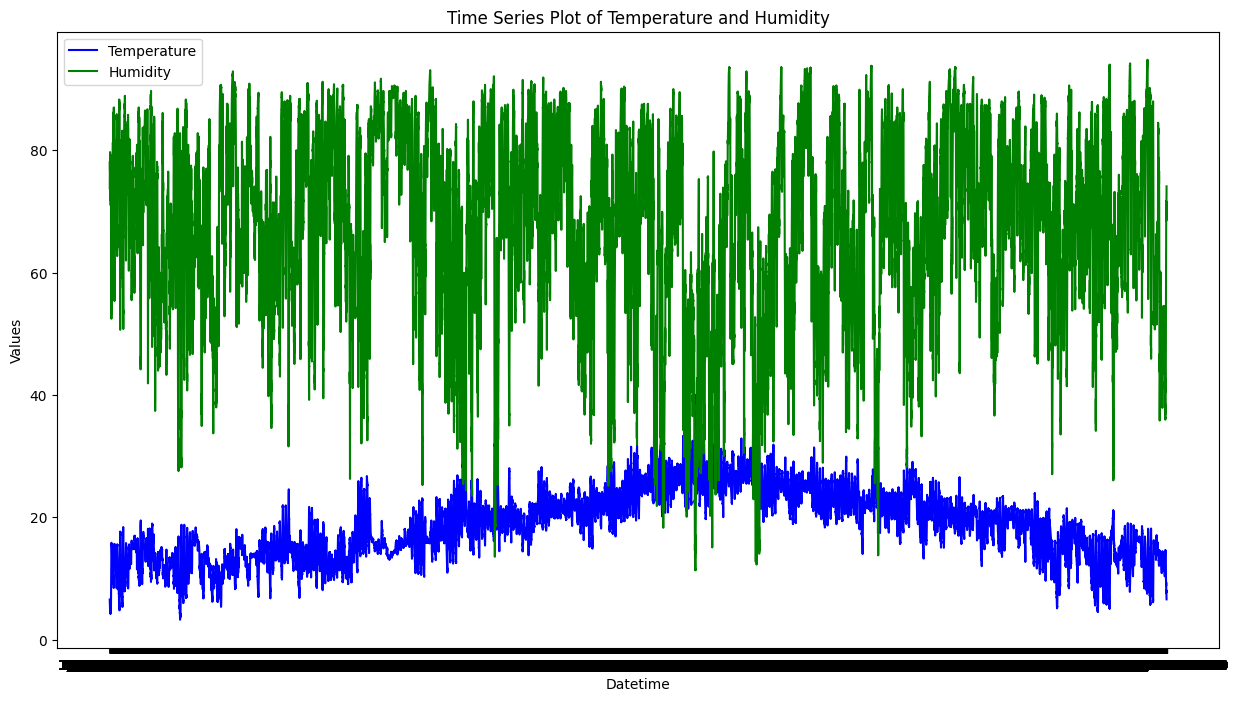

In [46]:
# Plot time series data
plt.figure(figsize=(15, 8))

plt.plot(usage_pandas['Datetime'], usage_pandas['Temperature'], label='Temperature', color='blue')
plt.plot(usage_pandas['Datetime'], usage_pandas['Humidity'], label='Humidity', color='green')

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Time Series Plot of Temperature and Humidity')
plt.legend()
plt.show()

In [49]:
usage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))
usage_pandas = usage.toPandas()

# Seasonal decomposition of time series
result = sm.tsa.seasonal_decompose(usage_pandas['Temperature'], period=seasonal_period)
result.plot()
plt.show()

C:\Users\S554962\big-data-venv\lib\site-packages\pyspark\sql\pandas\types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
C:\Users\S554962\big-data-venv\lib\site-packages\pyspark\sql\pandas\types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


NameError: name 'sm' is not defined

In [50]:
import statsmodels.api as sm

In [52]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install --upgrade pyspark
!pip install --upgrade pandas

usage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))
usage_pandas = usage.toPandas()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\S554962\\big-data-venv\\Lib\\site-packages\\~andas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/3d/c6/9bb3a165e915b9a43b2fd1d35620977bf1371e08538f3649585a1d7b4794/pandas-2.1.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB 991.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.7 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.7 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.7 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.7 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.7 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.7 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/10.7 MB 10.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/10.7 MB 12.5 MB/s eta 0:00:01
   ------------------------

In [54]:
!python -m pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 991.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.1 MB 2.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.1 MB 2.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 4.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [55]:
pip --version


pip 23.3.1 from C:\Users\S554962\big-data-venv\lib\site-packages\pip (python 3.10)

Note: you may need to restart the kernel to use updated packages.


In [56]:
usage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))
usage_pandas = usage.toPandas()

In [59]:
seasonal_period = 24  

result = sm.tsa.seasonal_decompose(df_pandas['Temperature'], period=seasonal_period)
result.plot()
plt.show()

NameError: name 'df_pandas' is not defined

In [60]:
usage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))

# Convert PySpark DataFrame to Pandas DataFrame
usage_pandas = usage.toPandas()

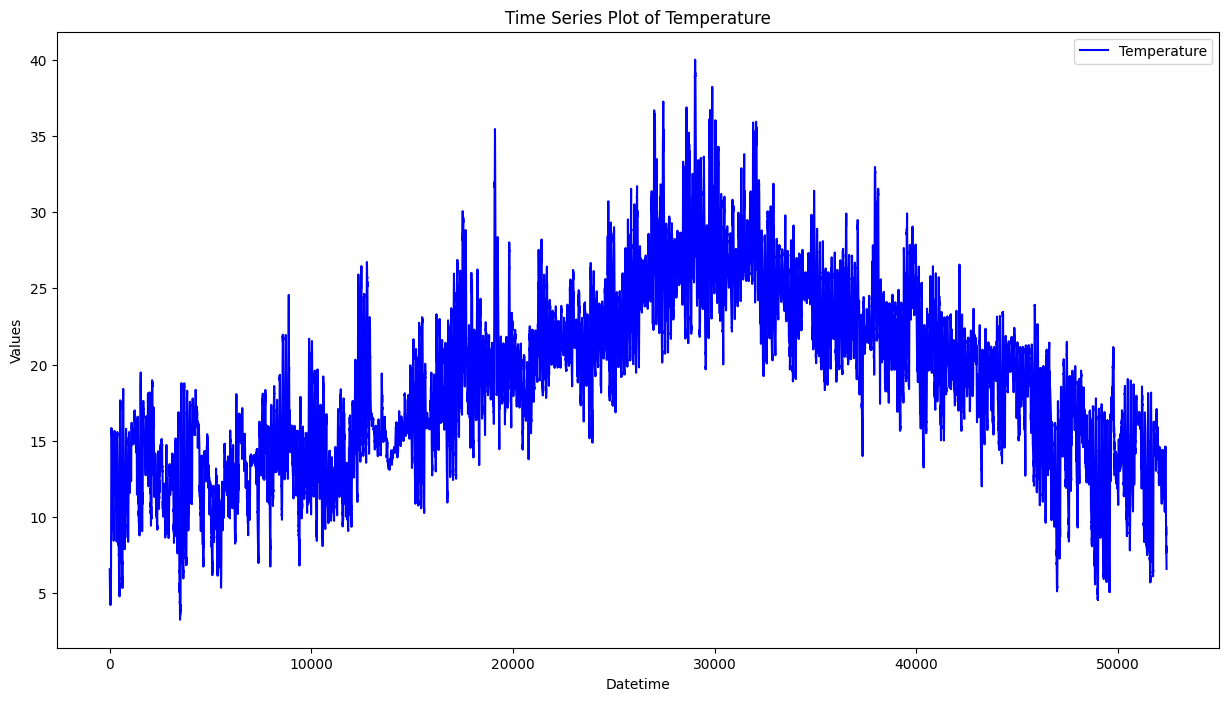

In [61]:
plt.figure(figsize=(15, 8))
plt.plot(usage_pandas['Temperature'], label='Temperature', color='blue')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Time Series Plot of Temperature')
plt.legend()
plt.show()

In [65]:
# Decompose Time Series to Identify Trend and Seasonality
seasonal_period = 24  # You need to define the appropriate seasonal period based on your data
result_temperature = seasonal_decompose(usage_pandas['Temperature'], period=seasonal_period)


<Figure size 1500x800 with 0 Axes>

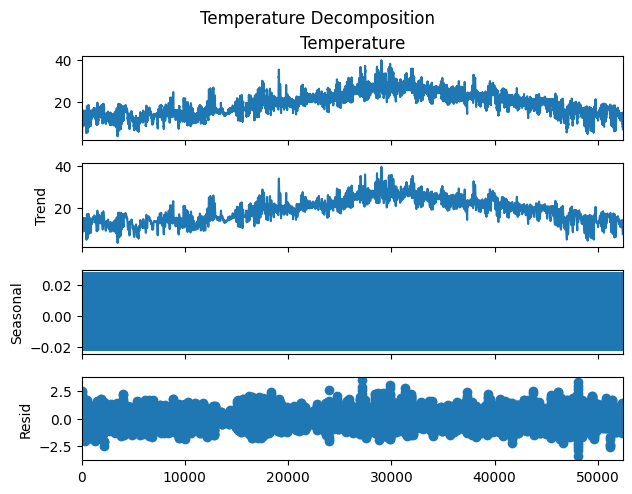

In [66]:
plt.figure(figsize=(15, 8))
result_temperature.plot().suptitle('Temperature Decomposition', y=1.02)
plt.show()

In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
# Convert the 'Datetime' column to a Pandas datetime object
usage = usage.withColumn("Datetime", usage["Datetime"].cast("timestamp"))
usage_pandas = usage.toPandas()

In [69]:
# Feature selection (assuming one parameter for simplicity)
features = usage_pandas[['Temperature']]

In [70]:
# Anomaly detection using Isolation Forest
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
anomaly_scores = model.fit_predict(features)

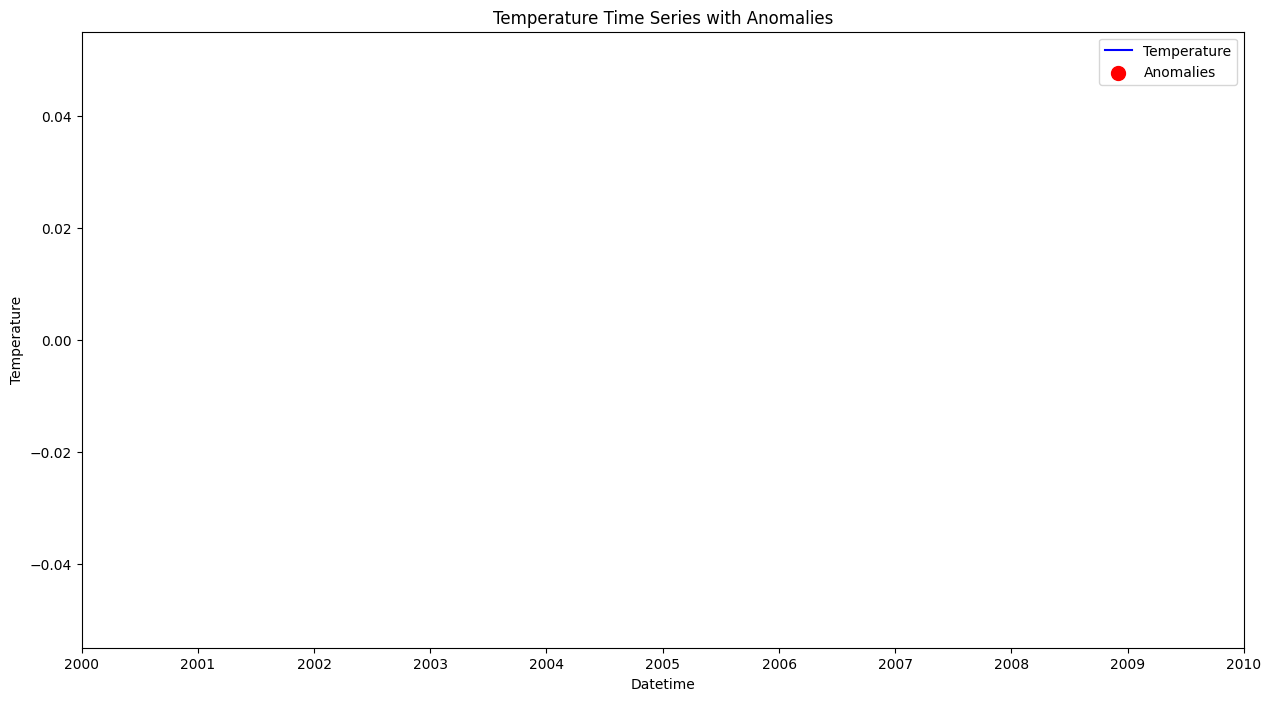

In [72]:
# Visualize anomalies
plt.figure(figsize=(15, 8))
plt.plot(usage_pandas['Datetime'], usage_pandas['Temperature'], label='Temperature', color='blue')
plt.scatter(usage_pandas['Datetime'][anomaly_scores == -1], usage_pandas['Temperature'][anomaly_scores == -1],
            label='Anomalies', color='red', s=100)
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Time Series with Anomalies')
plt.legend()
plt.show()

In [73]:
# Feature selection (assuming one parameter for simplicity)
features = usage_pandas[['Temperature']]

In [74]:
# Anomaly detection using Isolation Forest
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
anomaly_scores = model.fit_predict(features)

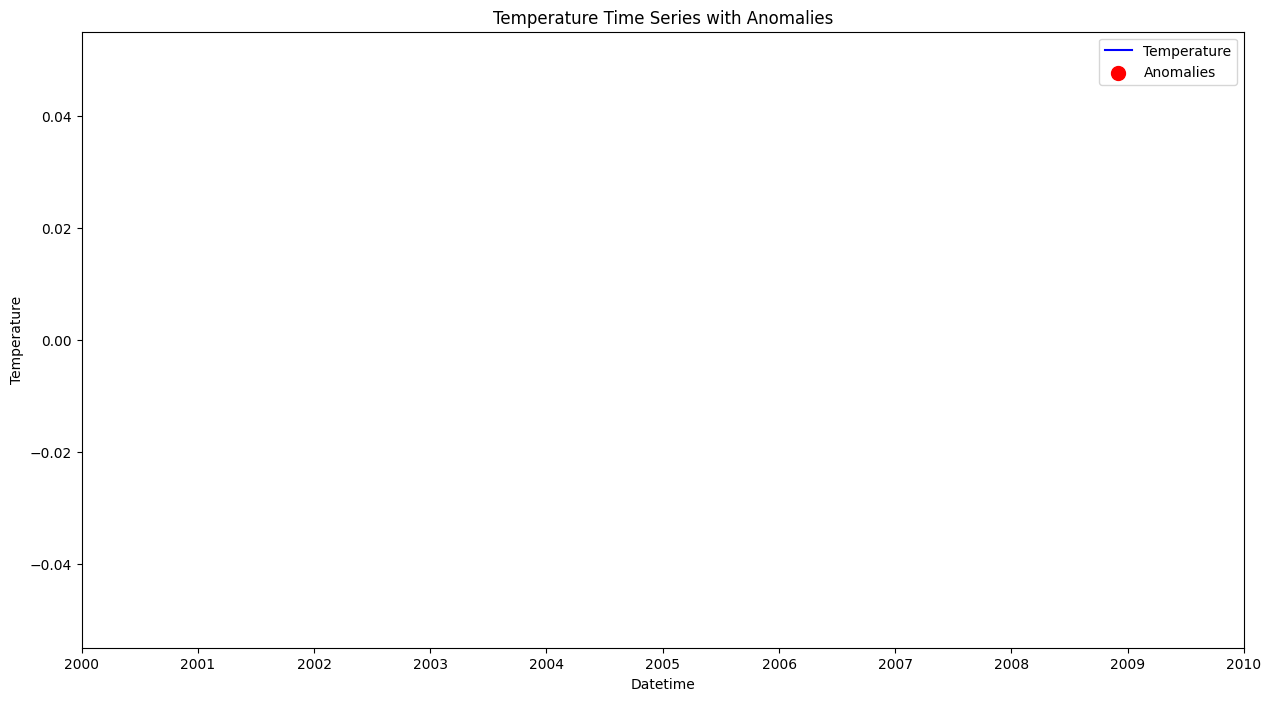

In [75]:
# Visualize anomalies
plt.figure(figsize=(15, 8))
plt.plot(usage_pandas['Datetime'], usage_pandas['Temperature'], label='Temperature', color='blue')
plt.scatter(usage_pandas['Datetime'][anomaly_scores == -1], usage_pandas['Temperature'][anomaly_scores == -1],
            label='Anomalies', color='red', s=100)
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Time Series with Anomalies')
plt.legend()
plt.show()

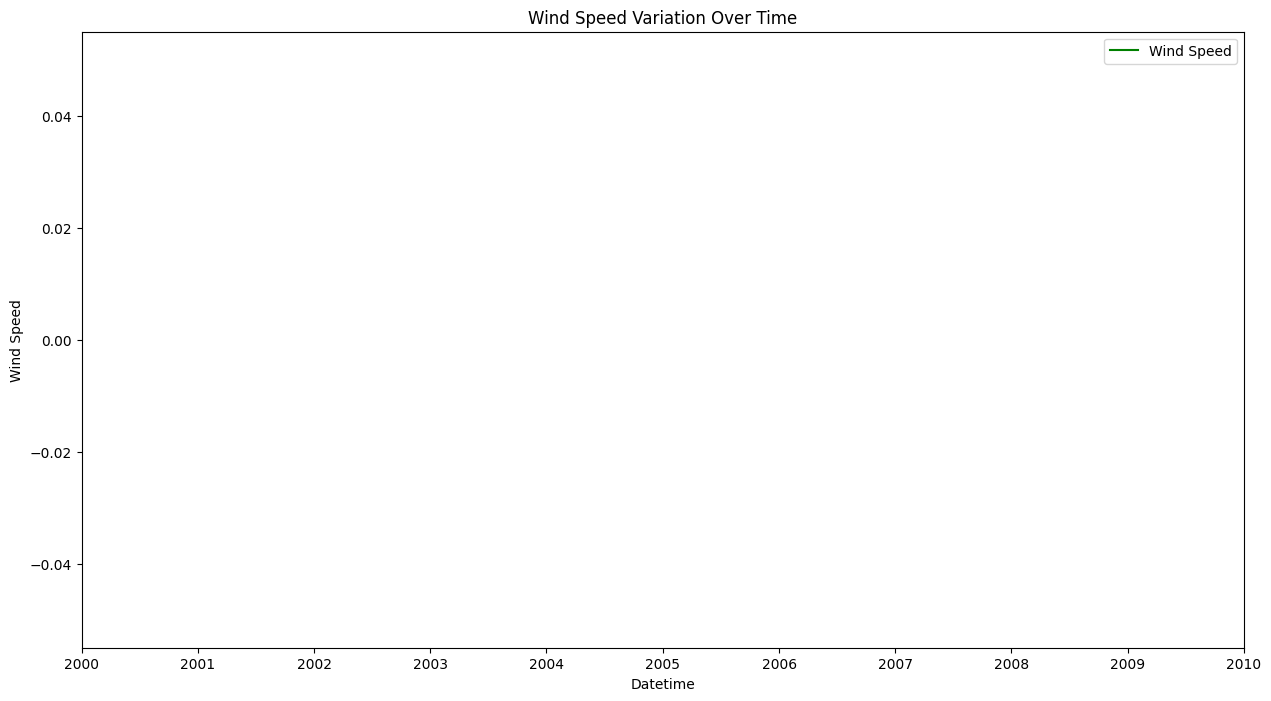

In [78]:
plt.figure(figsize=(15, 8))
plt.plot(usage_pandas['Datetime'], usage_pandas['WindSpeed'], label='Wind Speed', color='green')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Variation Over Time')
plt.legend()
plt.show()